# Análise dos Fatores Condicionantes das Ocorrências no Nordeste

##Bibliotecas e Montagem do drive

In [0]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(15,10)})

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Importando Ocorrências Nordeste

In [0]:
df_ocorrencias = pd.read_csv('gdrive/My Drive/projetos/lp/oco.csv', sep='~', header=0,usecols=['codigo_ocorrencia', 'ocorrencia_uf', 'ocorrencia_dia'])

#Substituindo dia da ocorrência para mês
df_ocorrencias['ocorrencia_dia'] = pd.to_datetime(df_ocorrencias.ocorrencia_dia)
df_ocorrencias['mes'] = df_ocorrencias['ocorrencia_dia'].dt.strftime('%Y-%m')
df_ocorrencias.drop('ocorrencia_dia', axis=1, inplace=True)

df_ocorrencias_nordeste = df_ocorrencias.loc[df_ocorrencias['ocorrencia_uf'].isin(['AL','BA','CE','MA','PB','PE','PI','RN','SE'])]

print(df_ocorrencias_nordeste.shape)
df_ocorrencias_nordeste.head()

(609, 3)


,codigo_ocorrencia,ocorrencia_uf,mes
53,201012113981199,AL,2010-12
235,200903207404883,PI,2009-03
250,201502161306401,MA,2015-02
251,201205251709274,MA,2012-05
301,201812301440298,SE,2018-12


##Tabela todos os meses da amostra

In [0]:
df_tabela_mes = df_ocorrencias.groupby('mes').size().reset_index(name='Quantidade')

df_meses = pd.DataFrame(df_tabela_mes['mes'])

print(df_meses.shape)
df_meses.head()

(133, 1)


,mes
0,2008-01
1,2008-02
2,2008-03
3,2008-04
4,2008-05


##Teste Hipóteses (Condições Metereológicas)

**H0:** As condições meteorológicas não influenciam nas ocorrências aeronáuticas civis analisadas pelo CENIPA na região Nordeste do Brasil.

**H1:** As condições meteorológicas influenciam nas ocorrências aeronáuticas civis analisadas pelo CENIPA na região Nordeste do Brasil.

###Importando Fatores Contribuintes

In [0]:
df_fatores_contribuintes = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0, usecols=['codigo_ocorrencia', 'fator_nome'])

print(df_fatores_contribuintes.shape)
df_fatores_contribuintes.head()

(4800, 2)


,codigo_ocorrencia,fator_nome
0,200801041545367,INDISCIPLINA DE VOO
1,200801041545367,INSTRUÇÃO
2,200801041545367,MANUTENÇÃO DE AERONAVE
3,200801041545367,OUTRO FATOR
4,200801058203864,JULGAMENTO DE PILOTAGEM


###Merge das ocorrências com fatores contribuintes

In [0]:
df_ocorrencias_fatores = pd.merge(df_ocorrencias_nordeste, df_fatores_contribuintes, on='codigo_ocorrencia')


print(df_ocorrencias_fatores.shape)
df_ocorrencias_fatores.head()

(823, 4)


,codigo_ocorrencia,ocorrencia_uf,mes,fator_nome
0,201012113981199,AL,2010-12,MANUTENÇÃO DE AERONAVE
1,201012113981199,AL,2010-12,SUPERVISÃO GERENCIAL
2,200903207404883,PI,2009-03,JULGAMENTO DE PILOTAGEM
3,200903207404883,PI,2009-03,MANUTENÇÃO DE AERONAVE
4,200903207404883,PI,2009-03,SUPERVISÃO GERENCIAL


###Distribuição de eventos mensais (incluindo condições metereológicas)

133
[9, 5, 9, 5, 16, 6, 0, 11, 0, 6, 14, 11, 13, 2, 4, 10, 31, 0, 5, 0, 12, 14, 0, 13, 0, 7, 0, 17, 25, 0, 19, 6, 9, 24, 7, 22, 2, 12, 21, 0, 11, 28, 22, 13, 2, 9, 4, 3, 11, 7, 7, 6, 0, 7, 3, 5, 8, 1, 1, 0, 3, 0, 1, 0, 7, 1, 0, 3, 3, 26, 0, 13, 15, 2, 3, 15, 7, 0, 1, 2, 5, 4, 13, 6, 8, 3, 13, 0, 9, 23, 8, 3, 18, 5, 20, 0, 3, 0, 16, 6, 0, 2, 0, 0, 6, 0, 0, 3, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 4, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


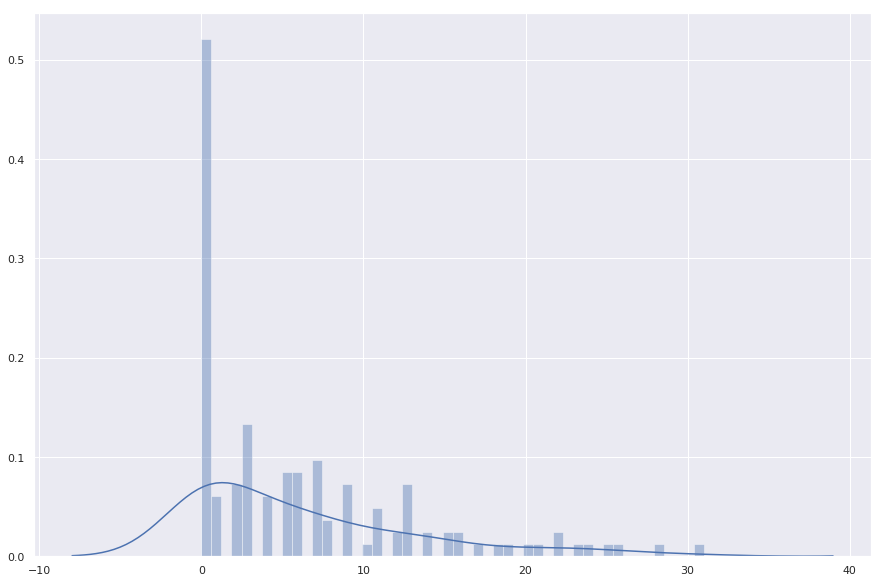

In [0]:
df_ocorrencias_fatores_agrupado = df_ocorrencias_fatores.groupby('mes').size().reset_index(name='Quantidade_Eventos')


#Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_total = pd.merge(df_meses, df_ocorrencias_fatores_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_total['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_totais = pd.Series(df_ocorrencias_fatores_total['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_totais))
print(lista_eventos_totais)

sns.distplot(lista_eventos_totais, bins=50, norm_hist=True)

###Distribuição de eventos mensais provocados por condições metereológicas

133
[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


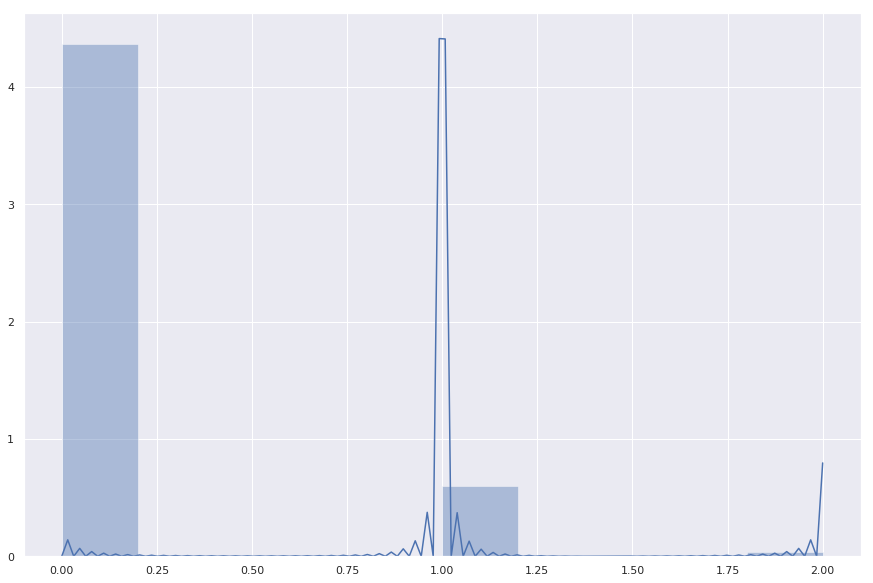

In [0]:
df_ocorrencias_fatores_eventos_totais = df_ocorrencias_fatores.groupby(['mes', 'fator_nome']).size().reset_index(name='Quantidade_Eventos')

#Tabela apenas com condições metereológicas
df_ocorrencias_fatores_eventos_apenas_cond_met = df_ocorrencias_fatores_eventos_totais.loc[df_ocorrencias_fatores_eventos_totais['fator_nome'] == 'CONDIÇÕES METEOROLÓGICAS ADVERSAS']

#Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_eventos_cond_met = pd.merge(df_meses, df_ocorrencias_fatores_eventos_apenas_cond_met, on = 'mes', how = 'left')
df_ocorrencias_fatores_eventos_cond_met['Quantidade_Eventos'].fillna(0, inplace = True)

df_ocorrencias_fatores_eventos_cond_met = df_ocorrencias_fatores_eventos_cond_met.drop('fator_nome', axis=1)

lista_eventos_totais_cond_met = pd.Series(df_ocorrencias_fatores_eventos_cond_met['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_totais_cond_met))
print(lista_eventos_totais_cond_met)

sns.distplot(lista_eventos_totais_cond_met, bins=10, norm_hist=True)

###Distribuição de eventos mensais retirando os provocados por condições metereológicas

133
[9, 5, 8, 4, 15, 6, 0, 10, 0, 6, 13, 11, 13, 2, 4, 10, 29, 0, 5, 0, 11, 14, 0, 12, 0, 7, 0, 17, 25, 0, 18, 6, 9, 24, 7, 21, 2, 12, 21, 0, 11, 27, 22, 13, 2, 9, 4, 3, 10, 7, 6, 6, 0, 7, 3, 5, 7, 1, 1, 0, 3, 0, 1, 0, 7, 1, 0, 3, 3, 26, 0, 13, 14, 2, 3, 15, 7, 0, 1, 2, 5, 4, 12, 6, 8, 3, 13, 0, 9, 23, 8, 3, 18, 5, 20, 0, 3, 0, 16, 5, 0, 2, 0, 0, 6, 0, 0, 3, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 4, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


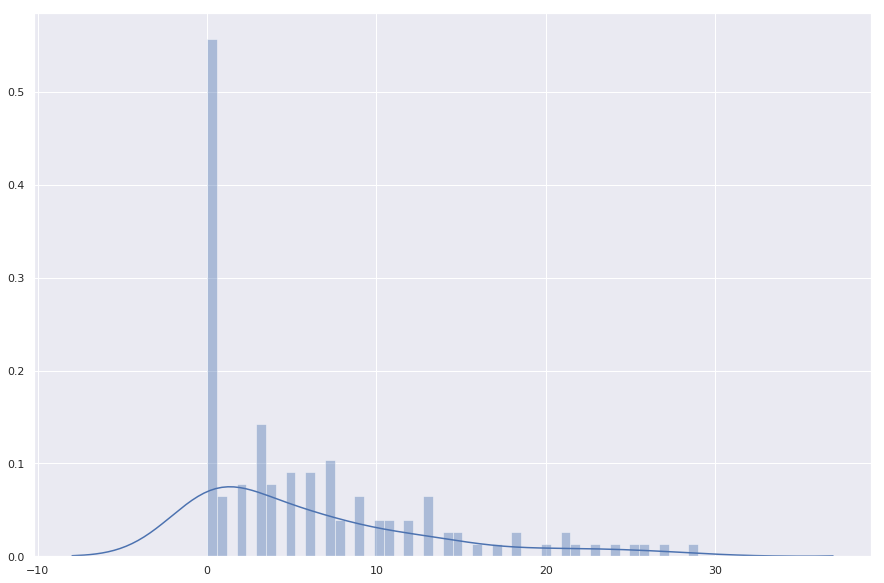

In [0]:
df_ocorrencias_fatores_total_sem_cond_meter = df_ocorrencias_fatores[df_ocorrencias_fatores['fator_nome'].isin(['CONDIÇÕES METEOROLÓGICAS ADVERSAS']) == False]

df_ocorrencias_fatores_total_sem_cond_meter_agrupado = df_ocorrencias_fatores_total_sem_cond_meter.groupby('mes').size().reset_index(name='Quantidade_Eventos')

# #Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_total_sem_cond_meter_com_zeros = pd.merge(df_meses, df_ocorrencias_fatores_total_sem_cond_meter_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_total_sem_cond_meter_com_zeros['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_sem_cond_meter_total = pd.Series(df_ocorrencias_fatores_total_sem_cond_meter_com_zeros['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_sem_cond_meter_total))
print(lista_eventos_sem_cond_meter_total)

sns.distplot(lista_eventos_sem_cond_meter_total, bins=50, norm_hist=True)

###T-test (eventos mensais sem condições metereológicas / eventos mensais provocados por condições metereológicas)

In [0]:
print(lista_eventos_sem_cond_meter_total)
print(lista_eventos_totais_cond_met)

stats.ttest_rel(lista_eventos_sem_cond_meter_total,lista_eventos_totais_cond_met)

[9, 5, 8, 4, 15, 6, 0, 10, 0, 6, 13, 11, 13, 2, 4, 10, 29, 0, 5, 0, 11, 14, 0, 12, 0, 7, 0, 17, 25, 0, 18, 6, 9, 24, 7, 21, 2, 12, 21, 0, 11, 27, 22, 13, 2, 9, 4, 3, 10, 7, 6, 6, 0, 7, 3, 5, 7, 1, 1, 0, 3, 0, 1, 0, 7, 1, 0, 3, 3, 26, 0, 13, 14, 2, 3, 15, 7, 0, 1, 2, 5, 4, 12, 6, 8, 3, 13, 0, 9, 23, 8, 3, 18, 5, 20, 0, 3, 0, 16, 5, 0, 2, 0, 0, 6, 0, 0, 3, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 4, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ttest_relResult(statistic=9.942769416085675, pvalue=9.949510403469258e-18)

###T-test (eventos mensais geral / eventos mensais provocados por condições metereológicas)

In [0]:
print(lista_eventos_totais)
print(lista_eventos_totais_cond_met)

stats.ttest_rel(lista_eventos_totais,lista_eventos_totais_cond_met)

[9, 5, 9, 5, 16, 6, 0, 11, 0, 6, 14, 11, 13, 2, 4, 10, 31, 0, 5, 0, 12, 14, 0, 13, 0, 7, 0, 17, 25, 0, 19, 6, 9, 24, 7, 22, 2, 12, 21, 0, 11, 28, 22, 13, 2, 9, 4, 3, 11, 7, 7, 6, 0, 7, 3, 5, 8, 1, 1, 0, 3, 0, 1, 0, 7, 1, 0, 3, 3, 26, 0, 13, 15, 2, 3, 15, 7, 0, 1, 2, 5, 4, 13, 6, 8, 3, 13, 0, 9, 23, 8, 3, 18, 5, 20, 0, 3, 0, 16, 6, 0, 2, 0, 0, 6, 0, 0, 3, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 4, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ttest_relResult(statistic=9.958968805626913, pvalue=9.065888407807104e-18)

###T-test (eventos mensais geral / eventos mensais sem condições metereológicas)

[9, 5, 9, 5, 16, 6, 0, 11, 0, 6, 14, 11, 13, 2, 4, 10, 31, 0, 5, 0, 12, 14, 0, 13, 0, 7, 0, 17, 25, 0, 19, 6, 9, 24, 7, 22, 2, 12, 21, 0, 11, 28, 22, 13, 2, 9, 4, 3, 11, 7, 7, 6, 0, 7, 3, 5, 8, 1, 1, 0, 3, 0, 1, 0, 7, 1, 0, 3, 3, 26, 0, 13, 15, 2, 3, 15, 7, 0, 1, 2, 5, 4, 13, 6, 8, 3, 13, 0, 9, 23, 8, 3, 18, 5, 20, 0, 3, 0, 16, 6, 0, 2, 0, 0, 6, 0, 0, 3, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 4, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[9, 5, 8, 4, 15, 6, 0, 10, 0, 6, 13, 11, 13, 2, 4, 10, 29, 0, 5, 0, 11, 14, 0, 12, 0, 7, 0, 17, 25, 0, 18, 6, 9, 24, 7, 21, 2, 12, 21, 0, 11, 27, 22, 13, 2, 9, 4, 3, 10, 7, 6, 6, 0, 7, 3, 5, 7, 1, 1, 0, 3, 0, 1, 0, 7, 1, 0, 3, 3, 26, 0, 13, 14, 2, 3, 15, 7, 0, 1, 2, 5, 4, 12, 6, 8, 3, 13, 0, 9, 23, 8, 3, 18, 5, 20, 0, 3, 0, 16, 5, 0, 2, 0, 0, 6, 0, 0, 3, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 4, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ttest_indResult(statistic=0.1556621171196271, pvalue=0.8764183149087306)


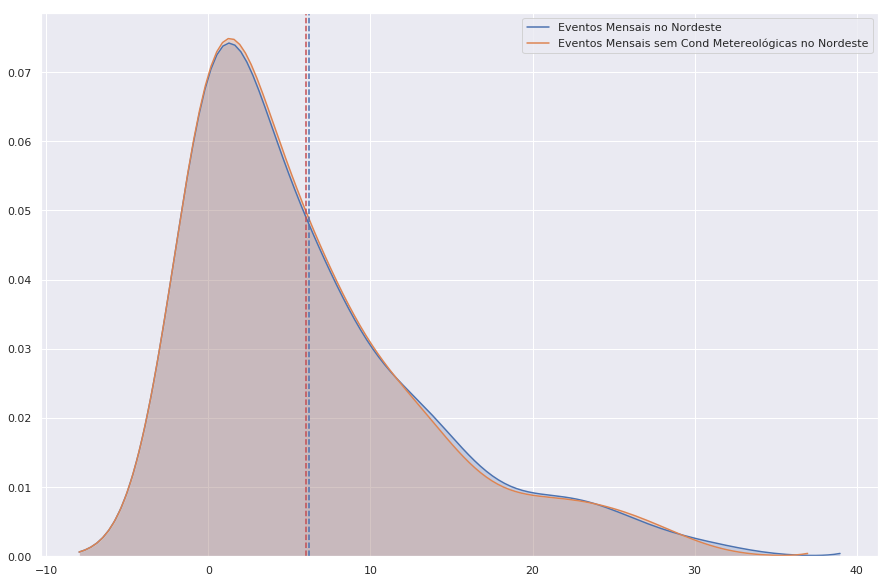

In [0]:
print(lista_eventos_totais)
print(lista_eventos_sem_cond_meter_total)

print(stats.mstats.ttest_ind(lista_eventos_totais,lista_eventos_sem_cond_meter_total))

sns.kdeplot(lista_eventos_totais, label='Eventos Mensais no Nordeste', shade=True)
sns.kdeplot(lista_eventos_sem_cond_meter_total, label='Eventos Mensais sem Cond Metereológicas no Nordeste', shade=True)

m = sum(lista_eventos_totais) / len(lista_eventos_totais)
plt.axvline(m, color="b", linestyle="--");

n = sum(lista_eventos_sem_cond_meter_total) / len(lista_eventos_sem_cond_meter_total)
plt.axvline(n, color="r", linestyle="--");

##Teste Hipóteses (Desempenho do Ser Humano)

**H0:** O desempenho do ser humano não influencia nas ocorrências aeronáuticas civis analisadas pelo CENIPA na região Nordeste do Brasil.

**H1:** O desempenho do ser humano influencia nas ocorrências aeronáuticas civis analisadas pelo CENIPA na região Nordeste do Brasil.

###Importando Fatores Aspecto

In [0]:
df_fator_aspecto = pd.read_csv('gdrive/My Drive/projetos/lp/ftc.csv', sep='~', header=0, usecols=['codigo_ocorrencia', 'fator_aspecto'])

print(df_fator_aspecto.shape)
df_fator_aspecto.head()

(4800, 2)


,codigo_ocorrencia,fator_aspecto
0,200801041545367,DESEMPENHO DO SER HUMANO
1,200801041545367,DESEMPENHO DO SER HUMANO
2,200801041545367,DESEMPENHO DO SER HUMANO
3,200801041545367,***
4,200801058203864,DESEMPENHO DO SER HUMANO


###Merge das ocorrências com fatores aspecto

In [0]:
df_ocorrencias_fatores_aspecto = pd.merge(df_ocorrencias_nordeste, df_fator_aspecto, on='codigo_ocorrencia')

print(df_ocorrencias_fatores_aspecto.shape)
df_ocorrencias_fatores_aspecto.head()

(823, 4)


,codigo_ocorrencia,ocorrencia_uf,mes,fator_aspecto
0,201012113981199,AL,2010-12,DESEMPENHO DO SER HUMANO
1,201012113981199,AL,2010-12,DESEMPENHO DO SER HUMANO
2,200903207404883,PI,2009-03,DESEMPENHO DO SER HUMANO
3,200903207404883,PI,2009-03,DESEMPENHO DO SER HUMANO
4,200903207404883,PI,2009-03,DESEMPENHO DO SER HUMANO


###Distribuição de eventos mensais (incluindo desempenho humano)

133
[9, 5, 9, 5, 16, 6, 0, 11, 0, 6, 14, 11, 13, 2, 4, 10, 31, 0, 5, 0, 12, 14, 0, 13, 0, 7, 0, 17, 25, 0, 19, 6, 9, 24, 7, 22, 2, 12, 21, 0, 11, 28, 22, 13, 2, 9, 4, 3, 11, 7, 7, 6, 0, 7, 3, 5, 8, 1, 1, 0, 3, 0, 1, 0, 7, 1, 0, 3, 3, 26, 0, 13, 15, 2, 3, 15, 7, 0, 1, 2, 5, 4, 13, 6, 8, 3, 13, 0, 9, 23, 8, 3, 18, 5, 20, 0, 3, 0, 16, 6, 0, 2, 0, 0, 6, 0, 0, 3, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 4, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


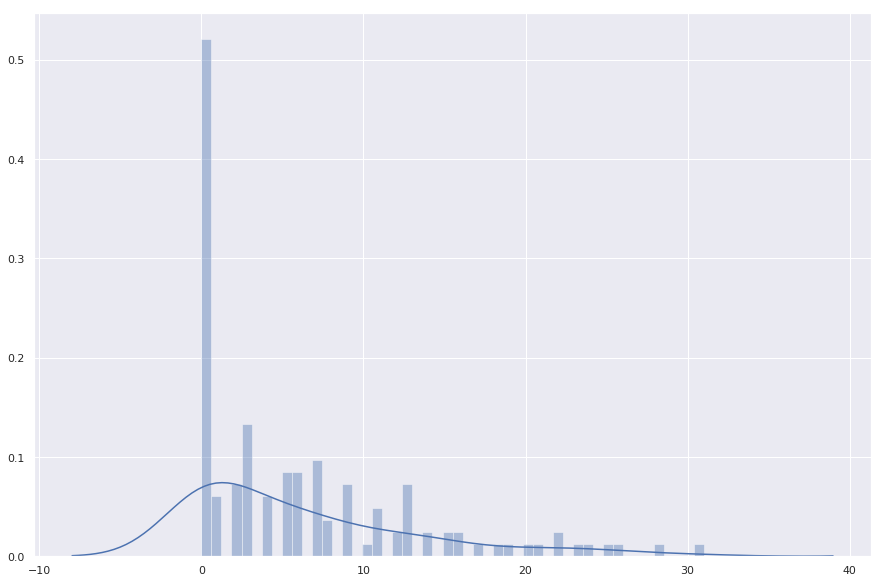

In [0]:
df_ocorrencias_fatores_aspecto_total_agrupado = df_ocorrencias_fatores_aspecto.groupby('mes').size().reset_index(name='Quantidade_Eventos')

#Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_aspecto_total = pd.merge(df_meses, df_ocorrencias_fatores_aspecto_total_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_aspecto_total['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_totais = pd.Series(df_ocorrencias_fatores_aspecto_total['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_totais))
print(lista_eventos_totais)

sns.distplot(lista_eventos_totais, bins=50, norm_hist=True)

###Distribuição de eventos mensais provocados por desempenho ser humano

133
[5, 4, 5, 3, 8, 4, 0, 6, 0, 3, 8, 6, 9, 2, 3, 10, 19, 0, 5, 0, 5, 5, 0, 5, 0, 4, 0, 10, 11, 0, 13, 2, 8, 14, 4, 14, 2, 8, 15, 0, 4, 10, 9, 5, 2, 3, 3, 2, 4, 7, 5, 6, 0, 4, 2, 4, 5, 1, 1, 0, 3, 0, 1, 0, 3, 1, 0, 2, 2, 15, 0, 6, 8, 1, 3, 9, 7, 0, 1, 2, 3, 3, 5, 6, 7, 3, 9, 0, 7, 10, 4, 3, 7, 2, 9, 0, 3, 0, 11, 5, 0, 2, 0, 0, 4, 0, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


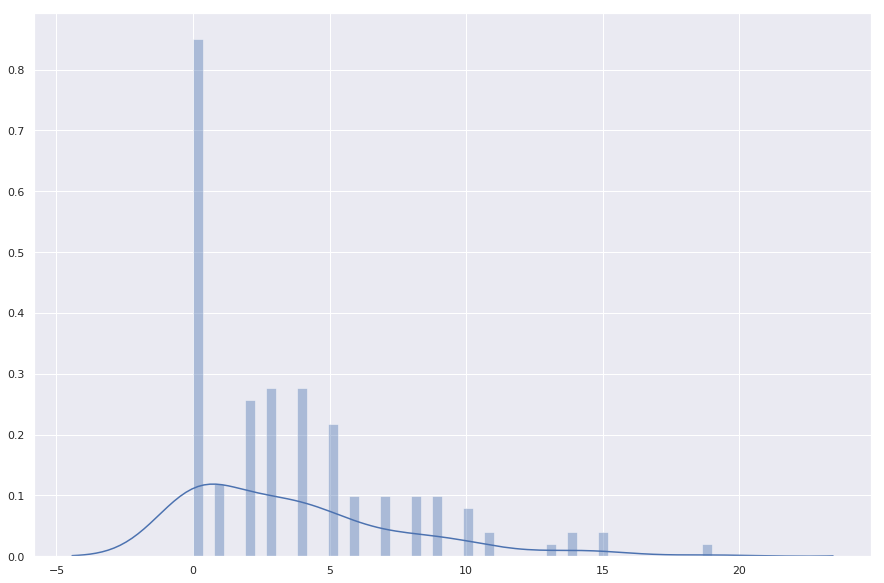

In [0]:
df_ocorrencias_fatores_aspecto_eventos_totais = df_ocorrencias_fatores_aspecto.groupby(['mes', 'fator_aspecto']).size().reset_index(name='Quantidade_Eventos')

df_ocorrencias_fatores_aspecto_humano_agrupado = df_ocorrencias_fatores_aspecto_eventos_totais.loc[df_ocorrencias_fatores_aspecto_eventos_totais['fator_aspecto'] == 'DESEMPENHO DO SER HUMANO']

#Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_aspecto_humano = pd.merge(df_meses, df_ocorrencias_fatores_aspecto_humano_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_aspecto_humano['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_totais_asp_humano = pd.Series(df_ocorrencias_fatores_aspecto_humano['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_totais_asp_humano))
print(lista_eventos_totais_asp_humano)

sns.distplot(lista_eventos_totais_asp_humano, bins=50, norm_hist=True)

###Distribuição de eventos mensais retirando os provocados por desempenho humano

133
[4, 1, 4, 2, 8, 2, 0, 5, 0, 3, 6, 5, 4, 0, 1, 0, 12, 0, 0, 0, 7, 9, 0, 8, 0, 3, 0, 7, 14, 0, 6, 4, 1, 10, 3, 8, 0, 4, 6, 0, 7, 18, 13, 8, 0, 6, 1, 1, 7, 0, 2, 0, 0, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, 11, 0, 7, 7, 1, 0, 6, 0, 0, 0, 0, 2, 1, 8, 0, 1, 0, 4, 0, 2, 13, 4, 0, 11, 3, 11, 0, 0, 0, 5, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


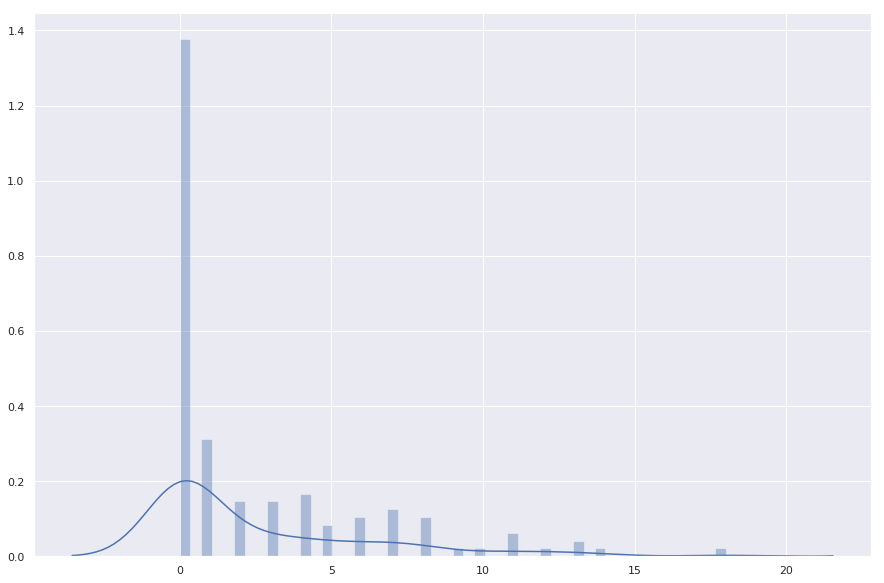

In [0]:
df_ocorrencias_fatores_totais_sem_desemp_hum = df_ocorrencias_fatores_aspecto[df_ocorrencias_fatores_aspecto['fator_aspecto'].isin(['DESEMPENHO DO SER HUMANO']) == False]

df_ocorrencias_fatores_totais_sem_desemp_hum_agrupado = df_ocorrencias_fatores_totais_sem_desemp_hum.groupby('mes').size().reset_index(name='Quantidade_Eventos')

# #Merge para adicionar zeros nos meses que não tiveram eventos
df_ocorrencias_fatores_totais_sem_desemp_hum_com_zeros = pd.merge(df_meses, df_ocorrencias_fatores_totais_sem_desemp_hum_agrupado, on = 'mes', how = 'left')
df_ocorrencias_fatores_totais_sem_desemp_hum_com_zeros['Quantidade_Eventos'].fillna(0, inplace = True)

lista_eventos_sem_desemp_hum_total = pd.Series(df_ocorrencias_fatores_totais_sem_desemp_hum_com_zeros['Quantidade_Eventos']).astype(int).tolist()

print(len(lista_eventos_sem_desemp_hum_total))
print(lista_eventos_sem_desemp_hum_total)

sns.distplot(lista_eventos_sem_desemp_hum_total, bins=50, norm_hist=True)

###T-test (eventos mensais sem desempenho humano / eventos mensais provocados por desempenho humano)

In [0]:
print(lista_eventos_sem_desemp_hum_total)
print(lista_eventos_totais_asp_humano)

stats.ttest_rel(lista_eventos_sem_desemp_hum_total,lista_eventos_totais_asp_humano)

[4, 1, 4, 2, 8, 2, 0, 5, 0, 3, 6, 5, 4, 0, 1, 0, 12, 0, 0, 0, 7, 9, 0, 8, 0, 3, 0, 7, 14, 0, 6, 4, 1, 10, 3, 8, 0, 4, 6, 0, 7, 18, 13, 8, 0, 6, 1, 1, 7, 0, 2, 0, 0, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, 11, 0, 7, 7, 1, 0, 6, 0, 0, 0, 0, 2, 1, 8, 0, 1, 0, 4, 0, 2, 13, 4, 0, 11, 3, 11, 0, 0, 0, 5, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 4, 5, 3, 8, 4, 0, 6, 0, 3, 8, 6, 9, 2, 3, 10, 19, 0, 5, 0, 5, 5, 0, 5, 0, 4, 0, 10, 11, 0, 13, 2, 8, 14, 4, 14, 2, 8, 15, 0, 4, 10, 9, 5, 2, 3, 3, 2, 4, 7, 5, 6, 0, 4, 2, 4, 5, 1, 1, 0, 3, 0, 1, 0, 3, 1, 0, 2, 2, 15, 0, 6, 8, 1, 3, 9, 7, 0, 1, 2, 3, 3, 5, 6, 7, 3, 9, 0, 7, 10, 4, 3, 7, 2, 9, 0, 3, 0, 11, 5, 0, 2, 0, 0, 4, 0, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ttest_relResult(statistic=-4.777247444574773, pvalue=4.660109006614293e-06)

###T-test (eventos mensais geral / eventos mensais provocados por desempenho humano)

In [0]:
print(lista_eventos_totais)
print(lista_eventos_totais_asp_humano)

stats.ttest_rel(lista_eventos_totais,lista_eventos_totais_asp_humano)

[9, 5, 9, 5, 16, 6, 0, 11, 0, 6, 14, 11, 13, 2, 4, 10, 31, 0, 5, 0, 12, 14, 0, 13, 0, 7, 0, 17, 25, 0, 19, 6, 9, 24, 7, 22, 2, 12, 21, 0, 11, 28, 22, 13, 2, 9, 4, 3, 11, 7, 7, 6, 0, 7, 3, 5, 8, 1, 1, 0, 3, 0, 1, 0, 7, 1, 0, 3, 3, 26, 0, 13, 15, 2, 3, 15, 7, 0, 1, 2, 5, 4, 13, 6, 8, 3, 13, 0, 9, 23, 8, 3, 18, 5, 20, 0, 3, 0, 16, 6, 0, 2, 0, 0, 6, 0, 0, 3, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 4, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 4, 5, 3, 8, 4, 0, 6, 0, 3, 8, 6, 9, 2, 3, 10, 19, 0, 5, 0, 5, 5, 0, 5, 0, 4, 0, 10, 11, 0, 13, 2, 8, 14, 4, 14, 2, 8, 15, 0, 4, 10, 9, 5, 2, 3, 3, 2, 4, 7, 5, 6, 0, 4, 2, 4, 5, 1, 1, 0, 3, 0, 1, 0, 3, 1, 0, 2, 2, 15, 0, 6, 8, 1, 3, 9, 7, 0, 1, 2, 3, 3, 5, 6, 7, 3, 9, 0, 7, 10, 4, 3, 7, 2, 9, 0, 3, 0, 11, 5, 0, 2, 0, 0, 4, 0, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ttest_relResult(statistic=7.835202077977649, pvalue=1.3691821799529597e-12)

###T-test (eventos mensais geral / eventos mensais sem desempenho humano

[9, 5, 9, 5, 16, 6, 0, 11, 0, 6, 14, 11, 13, 2, 4, 10, 31, 0, 5, 0, 12, 14, 0, 13, 0, 7, 0, 17, 25, 0, 19, 6, 9, 24, 7, 22, 2, 12, 21, 0, 11, 28, 22, 13, 2, 9, 4, 3, 11, 7, 7, 6, 0, 7, 3, 5, 8, 1, 1, 0, 3, 0, 1, 0, 7, 1, 0, 3, 3, 26, 0, 13, 15, 2, 3, 15, 7, 0, 1, 2, 5, 4, 13, 6, 8, 3, 13, 0, 9, 23, 8, 3, 18, 5, 20, 0, 3, 0, 16, 6, 0, 2, 0, 0, 6, 0, 0, 3, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 4, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 1, 4, 2, 8, 2, 0, 5, 0, 3, 6, 5, 4, 0, 1, 0, 12, 0, 0, 0, 7, 9, 0, 8, 0, 3, 0, 7, 14, 0, 6, 4, 1, 10, 3, 8, 0, 4, 6, 0, 7, 18, 13, 8, 0, 6, 1, 1, 7, 0, 2, 0, 0, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, 11, 0, 7, 7, 1, 0, 6, 0, 0, 0, 0, 2, 1, 8, 0, 1, 0, 4, 0, 2, 13, 4, 0, 11, 3, 11, 0, 0, 0, 5, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ttest_indResult(statistic=5.228194623380566, pvalue=3.4841650184852977e-07)


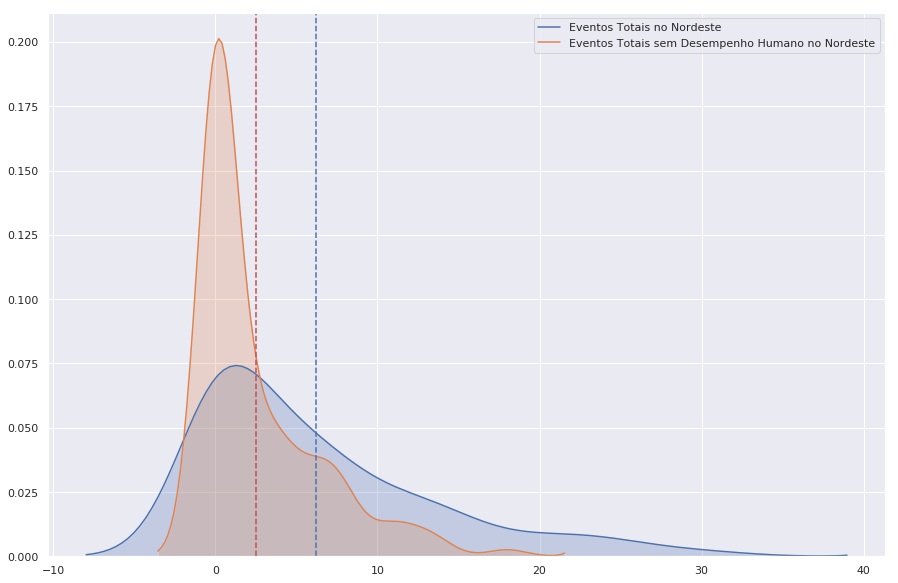

In [0]:
print(lista_eventos_totais)
print(lista_eventos_sem_desemp_hum_total)

print(stats.ttest_ind(lista_eventos_totais,lista_eventos_sem_desemp_hum_total))

sns.kdeplot(lista_eventos_totais, label='Eventos Totais no Nordeste', shade=True)
sns.kdeplot(lista_eventos_sem_desemp_hum_total, label='Eventos Totais sem Desempenho Humano no Nordeste', shade=True)

a = sum(lista_eventos_totais) / len(lista_eventos_totais)
plt.axvline(a, color="b", linestyle="--");

z = sum(lista_eventos_sem_desemp_hum_total) / len(lista_eventos_sem_desemp_hum_total)
plt.axvline(z, color="r", linestyle="--");